In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/Google_Stock_Price.csv")

In [ ]:
data.columns

Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [ ]:
data.isnull()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1756,False,False,False,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False,False,False,False
1758,False,False,False,False,False,False,False,False,False,False
1759,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
symbol,0
date,0
open,0
high,0
low,0
close,0
volume,0
adjclose,0
dividends,0
splits,0


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     1761 non-null   object 
 1   date       1761 non-null   object 
 2   open       1761 non-null   float64
 3   high       1761 non-null   float64
 4   low        1761 non-null   float64
 5   close      1761 non-null   float64
 6   volume     1761 non-null   int64  
 7   adjclose   1761 non-null   float64
 8   dividends  1761 non-null   float64
 9   splits     1761 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 137.7+ KB


In [ ]:
data['date']

,date
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1756,2024-12-24
1757,2024-12-26
1758,2024-12-27
1759,2024-12-30


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', inplace=True)
data.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


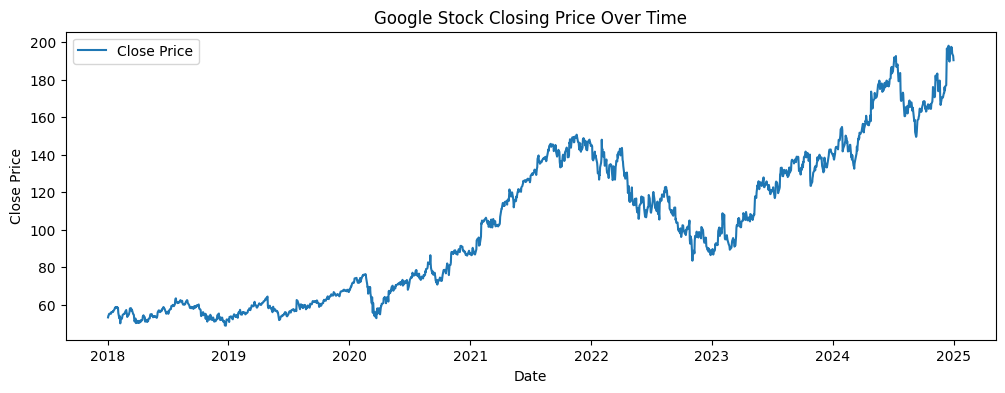

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['close'], label='Close Price')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# Calculate Moving Averages

data['MA_30'] = data['close'].rolling(window=30).mean()
data['MA_100'] = data['close'].rolling(window=100).mean()
data['MA_30']

,MA_30
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1756,181.527336
1757,181.986669
1758,182.438335
1759,182.949668


In [ ]:
data['MA_100']

,MA_100
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1756,170.047700
1757,170.412300
1758,170.747300
1759,171.066700


In [ ]:
# Daily Returns
data['daily_return'] = data['close'].pct_change()
data['daily_return']

,daily_return
0,NaN
1,0.016413
2,0.003621
3,0.014571
4,0.004273
...,...
1756,0.008062
1757,-0.002379
1758,-0.015525
1759,-0.006957


In [ ]:
# Volatility
data['volatility'] = data['high'] - data['low']

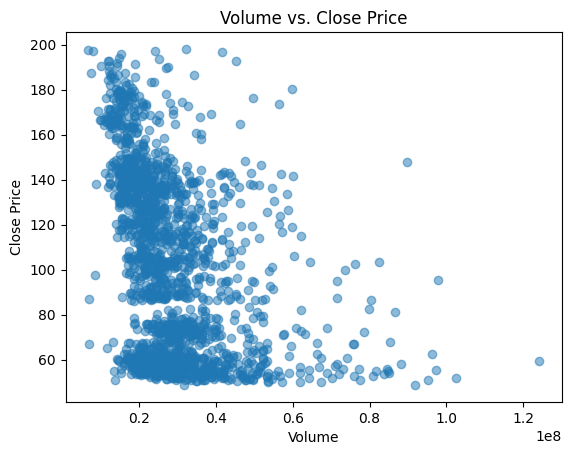

In [ ]:
plt.scatter(data['volume'], data['close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs. Close Price')
plt.show()

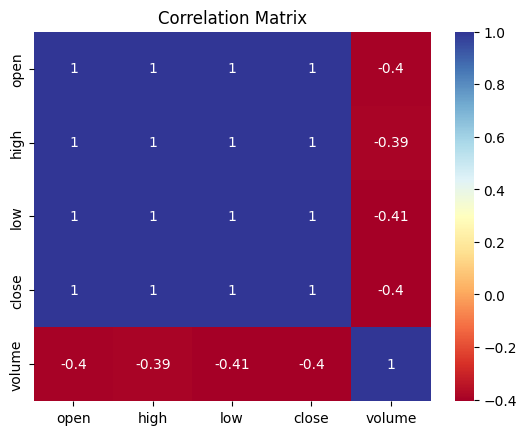

In [ ]:
# Correlation Matrix
import seaborn as sns

corr = data[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
data[['open', 'high', 'low', 'close', 'volume']].corr()

,open,high,low,close,volume
open,1.000000,0.999679,0.999642,0.999228,-0.397918
high,0.999679,1.000000,0.999609,0.999639,-0.392881
low,0.999642,0.999609,1.000000,0.999694,-0.406456
close,0.999228,0.999639,0.999694,1.000000,-0.400981
volume,-0.397918,-0.392881,-0.406456,-0.400981,1.000000
